# Project 1: World Development Statistics: Is Broadband accessible globally for all?

## Problem Statement

### Question: Is Broadband accessible globally for all?
A nonprofit, “Bridge the Gap,” is dedicated to partnering with large broadband companies abroad by informing and helping them decide to expand internet access and services in low-income areas. “Bridge the Gap” is running for a large grant from a multi-billion dollar corporation that would give the nonprofit funding to support the mission of helping provide broadband access to countries and areas that need it. This large corporation is US-based and not aware of the global impacts of broadband, its importance in low-income areas, and what it can do for countries/populations. The nonprofit's goal is to inform people about the inaccessibility of broadband in low-income countries and, through this, potentially get funds. This large corporation is looking for insight into its decision with data to support it. Our goal as the data scientists that will present this information with “Bridge the Gap” to the corporation is to first answer if Broadband is accessible globally for all, in addition to making recommendations/informing decisions of what countries the funds would go to since that is a requirement for the grant.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Since 1998, Broadband has established itself as a leading means to access the internet. 
Broadband is defined as the transmission of wide bandwidth data over a high-speed Internet connection([Source: Verizon](https://www.verizon.com/articles/internet-essentials/broadband-definition/)). Wi-Fi, being similar, provides wireless internet connections; however, the main difference between Wi-Fi and broadband is that broadband can be wireless or wired data and typically provides uninterrupted Internet access, while Wi-Fi may experience more interruptions and signal degradation. 


Broadband has been known to be crucial for accessing information without typical disruption of internet service for things such as teleconferencing, education, and healthcare. Because of its reliability, it has been said to be essential for economic growth and bridging the gap for opportunity in sectors such as education, employment, and healthcare, further positively contributing to economic development and enhancing services for all sectors([Source](https://www2.deloitte.com/us/en/pages/consulting/articles/bridging-the-digital-divide-with-broadband-for-all.html)).

Whether through Broadband or Wifi, in a country like the US, accessing information through the internet can often be done quickly, if not at the touch of our fingertips with the use of smartphones. In 2023, there were 311.3 million internet users in the U.S., with an internet penetration rate of 91.8% of the total population([Source](https://datareportal.com/reports/digital-2023-united-states-of-america)). While this may be true in countries such as the United States, this starkly contrasts many places in the world where internet access remains severely limited due to various factors, one of which is economic development.

A study from Data Reportal showed that approximately 67% of the world's population, equivalent to 5.4 billion people, are online, showing a growth rate of 4.7% since 2022([Source](https://datareportal.com/reports/digital-2023-united-states-of-america)). In this report, it was stated that 93% of people in high-income countries used the Internet compared to 27% in low-income countries ([Source](https://datareportal.com/reports/digital-2023-united-states-of-america)). It is important to note that broadband accessibility also varies on several factors in the global realm, one of them being infrastructure availability, especially in remote or rural areas due to infrastructure limitations; however, once implemented with the appropriate resources, high speed, and reliable internet connection can be feasible([Source](https://www.fcc.gov/consumers/guides/getting-broadband-qa)).

In the study, I will answer the question of whether Broadband is accessible for all globally and demonstrate the potential solutions. I will use various datasets to answer this question, including Gross National Income in Countries, population, and Broadband subscribers per 100 across several countries.

### Background on data
The following data was used in my analysis and was obtained from [Gapminder.com](https://www.gapminder.org/), a non-profit foundation based in Stockholm, Sweden, that aims to promote sustainable global development and enhance understanding of important global trends through the use of reliable data. With guidance from General Assembly, I was able to find this source.

Gross National Income (GNI) per capita in current US dollars - Variable: Gni_per_cap_atlas_method_con2021.csv - Includes data from 1800 to 2050

Population by Country - Variable: Population.csv - Includes data from 1800 to 2100

Broadband subscribers per 100 people - Variable: broadband_subscribers_per_100_people - Fixed broadband subcriptions refers to fixed subcriptions to high-speed access to the public internet(A TCP/IP Connection) at downstream speeds equal to or great than 256 kbit/s.This includes data from 1998 to 2022, as 1998 was the year Broadband was created. Note: I choose to look at Broadband subscribers per 100 people vs all Broadband subscribers due to manageability and more standardization comparison.

### For future use.

1. Manually calculate mean.

In [1]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

In [2]:
def ls_average(my_list):
    return sum(my_list) / len(my_list) 
ls_average(my_list) 

5.5

2. Manually calculate standard deviation.

In [3]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
# Find std (my_list)

mean = sum(my_list) / len(my_list)

sum_sq = sum((x - mean) ** 2 for x in my_list)

std = (sum_sq / (len(my_list) - 1)) ** 0.5

std

3.0276503540974917

3. Data cleaning function:
    
    Function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Will use these functions later on in the project!

In [5]:
# Code: 
str_mil = ('1M','2M','3M','4M','5M','6M','7M','8M','9M','10M')

In [6]:
def convert_num(str_num):
    if type(str_num) == int or type(str_num) == float:
        return int(str_num)
    
    if 'B' in str_num:
        return int(float(str_num.replace('B', '')) * 1000000000)
    
    if 'M' in str_num:
        return int(float(str_num.replace('M', '')) * 1000000)
    
    if 'K' in str_num:
        return int(float(str_num.replace('K', '')) * 1000)
    
    return int(str_num)

for num_str in str_mil:
    print(convert_num(num_str))

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000


--- 
# Part 2

In [7]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#pwd

## Data Import and Cleaning

In [9]:
# Import and view gni per cap, population and broadband subscribers data
gni_per_cap = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv')
population = pd.read_csv('../data/population.csv')
broadband_subscribers_per_100 = pd.read_csv('../data/broadband_subscribers_per_100_people.csv')

In [10]:
# Data preview.
broadband_subscribers_per_100.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,1.51,7.44,13,14.6,...,18.70000,18.50000,18.2000,NaN,NaN,NaN,17.9000,17.8000,17.8000,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,0.00085,0.0009,0.00197,...,0.00476,0.00458,0.0209,0.0254,0.0258,0.0436,0.0521,0.0682,0.0663,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037,...,0.08520,0.32300,0.5460,0.2910,0.3210,0.3500,0.3680,0.3640,0.3910,0.387
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00897,NaN,...,6.32000,7.21000,8.4300,9.2500,10.5000,12.6000,15.2000,17.8000,19.6000,20.500
4,Andorra,NaN,NaN,NaN,NaN,1.62,4.87,8.17,13,18.2,...,38.90000,40.20000,42.8000,44.8000,46.4000,47.5000,47.6000,48.5000,49.9000,51.100


In [11]:
# Code: Printing first 5 rows of each dataframe.
# 1:
gni_per_cap.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751.0,767.0,783.0,800.0,817.0,834.0,852.0,870.0,888.0,907.0
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770.0,2830.0,2890.0,2950.0,3010.0,3080.0,3140.0,3210.0,3280.0,3340.0
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610.0,9820.0,10000.0,10200.0,10500.0,10700.0,10900.0,11100.0,11400.0,11600.0
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47900.0,48900.0,50000.0,51000.0,52100.0,53200.0,54300.0,55500.0,56700.0,57900.0
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12800.0,13100.0,13400.0,13600.0,13900.0,14200.0,14500.0,14800.0,15200.0,15500.0


Printing first 5 rows of GNI dataframe.

In [12]:
population.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62500.0,62200.0,61900.0,61700.0,61400.0,61200.0,60900.0,60700.0,60500.0,60200.0
4,United Arab Emirates,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,13500000.0,13500000.0,13600000.0,13700000.0,13800000.0,13800000.0,13900000.0,14000000.0,14000000.0,14100000.0


Printing first 5 rows of population dataframe.

In [13]:
broadband_subscribers_per_100.head(5)

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,1.51,7.44,13,14.6,...,18.70000,18.50000,18.2000,NaN,NaN,NaN,17.9000,17.8000,17.8000,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,0.00085,0.0009,0.00197,...,0.00476,0.00458,0.0209,0.0254,0.0258,0.0436,0.0521,0.0682,0.0663,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037,...,0.08520,0.32300,0.5460,0.2910,0.3210,0.3500,0.3680,0.3640,0.3910,0.387
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00897,NaN,...,6.32000,7.21000,8.4300,9.2500,10.5000,12.6000,15.2000,17.8000,19.6000,20.500
4,Andorra,NaN,NaN,NaN,NaN,1.62,4.87,8.17,13,18.2,...,38.90000,40.20000,42.8000,44.8000,46.4000,47.5000,47.6000,48.5000,49.9000,51.100


Printing first 5 rows of Broadband subscribers dataframe. From my observations, I need to handle the null values in each dataset.

In [14]:
[population.isna().replace(True, np.NaN) for row in gni_per_cap]
population.head(5) 

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62500.0,62200.0,61900.0,61700.0,61400.0,61200.0,60900.0,60700.0,60500.0,60200.0
4,United Arab Emirates,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,13500000.0,13500000.0,13600000.0,13700000.0,13800000.0,13800000.0,13900000.0,14000000.0,14000000.0,14100000.0


In [15]:
[gni_per_cap.isna().replace(True, np.NaN) for row in gni_per_cap]
gni_per_cap.head(5) 

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751.0,767.0,783.0,800.0,817.0,834.0,852.0,870.0,888.0,907.0
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770.0,2830.0,2890.0,2950.0,3010.0,3080.0,3140.0,3210.0,3280.0,3340.0
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610.0,9820.0,10000.0,10200.0,10500.0,10700.0,10900.0,11100.0,11400.0,11600.0
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47900.0,48900.0,50000.0,51000.0,52100.0,53200.0,54300.0,55500.0,56700.0,57900.0
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12800.0,13100.0,13400.0,13600.0,13900.0,14200.0,14500.0,14800.0,15200.0,15500.0


In [16]:
[broadband_subscribers_per_100.isna().replace(True, np.NaN) for row in gni_per_cap]
broadband_subscribers_per_100.head(5) 

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,1.51,7.44,13,14.6,...,18.70000,18.50000,18.2000,NaN,NaN,NaN,17.9000,17.8000,17.8000,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,0.00085,0.0009,0.00197,...,0.00476,0.00458,0.0209,0.0254,0.0258,0.0436,0.0521,0.0682,0.0663,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037,...,0.08520,0.32300,0.5460,0.2910,0.3210,0.3500,0.3680,0.3640,0.3910,0.387
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00897,NaN,...,6.32000,7.21000,8.4300,9.2500,10.5000,12.6000,15.2000,17.8000,19.6000,20.500
4,Andorra,NaN,NaN,NaN,NaN,1.62,4.87,8.17,13,18.2,...,38.90000,40.20000,42.8000,44.8000,46.4000,47.5000,47.6000,48.5000,49.9000,51.100


Replaced missing data with Null values. In this case, I need there to be null values for when I drop columns. 

In [17]:
broadband_subscribers_per_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  208 non-null    object 
 1   1998     10 non-null     float64
 2   1999     14 non-null     float64
 3   2000     44 non-null     float64
 4   2001     79 non-null     float64
 5   2002     107 non-null    float64
 6   2003     127 non-null    object 
 7   2004     146 non-null    object 
 8   2005     170 non-null    object 
 9   2006     168 non-null    object 
 10  2007     182 non-null    float64
 11  2008     190 non-null    float64
 12  2009     193 non-null    float64
 13  2010     199 non-null    object 
 14  2011     191 non-null    object 
 15  2012     197 non-null    float64
 16  2013     201 non-null    float64
 17  2014     201 non-null    float64
 18  2015     202 non-null    float64
 19  2016     197 non-null    float64
 20  2017     197 non-null    float64
 21  2018     181 non

Assessing Data types for Broadband subscribers per 100 people due to replacing various null values.

In [18]:
# 3: Checking for any obvious issues with the observations, keeping in mind reasonable values for each column
gni_per_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Columns: 252 entries, country to 2050
dtypes: float64(229), int64(22), object(1)
memory usage: 376.2+ KB


In [19]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: float64(100), int64(201), object(1)
memory usage: 464.9+ KB


Checking for any obvious issues, already checked for Broadband subscribers per 100 people in line 55.

In [20]:
# 4: Fix any errors you identified in steps 2-3.

In [21]:
# 5: Displaying the data types of each feature.
gni_per_cap.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2046       float64
2047       float64
2048       float64
2049       float64
2050       float64
Length: 252, dtype: object

Displaying the data types of gni_per_cap as of now.

In [22]:
population.dtypes

country     object
1800         int64
1801         int64
1802         int64
1803         int64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

Displaying the data types of population as of now.

In [23]:
broadband_subscribers_per_100.dtypes

country     object
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003        object
2004        object
2005        object
2006        object
2007       float64
2008       float64
2009       float64
2010        object
2011        object
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
dtype: object

Displaying the data types of Broadband subscribers per 100 people as of now.

In [24]:
# 6: Fix any incorrect data types found in step 5.
#Fix any individual values preventing other columns from being the appropriate type.
#If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! Hint: use .map() or .apply().

#Converting B, M, K abbreviations for gni, not impacting column 1 which are countries.

import pandas as pd
import numpy as np

def convert_num(str_num):
    if pd.isnull(str_num):  
        return str_num  # Return NaN as it is
    multipliers = {'k': 1000, 'm': 1000000, 'b': 1000000000}
    str_num = str(str_num)  
    if str_num[-1].lower() in multipliers:
        return int(float(str_num[:-1]) * multipliers[str_num[-1].lower()])
    else:
        return int(float(str_num))  

gni_per_cap = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv')


gni_per_cap.iloc[:, 1:] = gni_per_cap.iloc[:, 1:].map(convert_num)


gni_per_cap.to_csv('../data/gni_per_cap_atlas_method_con2021.csv', index=False)


gni_per_cap.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751.0,767.0,783.0,800.0,817.0,834.0,852.0,870.0,888.0,907.0
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770.0,2830.0,2890.0,2950.0,3010.0,3080.0,3140.0,3210.0,3280.0,3340.0
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610.0,9820.0,10000.0,10200.0,10500.0,10700.0,10900.0,11100.0,11400.0,11600.0
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47900.0,48900.0,50000.0,51000.0,52100.0,53200.0,54300.0,55500.0,56700.0,57900.0
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12800.0,13100.0,13400.0,13600.0,13900.0,14200.0,14500.0,14800.0,15200.0,15500.0


Changed all numerical with abbreviated columns (ex. '3M', '45K', etc.) to integers for GNI per cap while exluding null(NaN)values.

In [25]:
#Converting B, M, K abbreviations for population, not impacting column 1 which are countries.
import pandas as pd
import numpy as np

def convert_num(str_num):
    if pd.isnull(str_num): 
        return str_num  
    multipliers = {'k': 1000, 'm': 1000000, 'b': 1000000000}
    str_num = str(str_num)  
    if str_num[-1].lower() in multipliers:
        return int(float(str_num[:-1]) * multipliers[str_num[-1].lower()])
    else:
        return int(float(str_num)) 


population = pd.read_csv('../data/population.csv')


population.iloc[:, 1:] = population.iloc[:, 1:].map(convert_num)


population.to_csv('../data/population.csv', index=False)

population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1350000.0,1320000.0,1290000.0,1260000.0,1230000.0,1210000.0,1180000.0,1150000.0,1120000.0,1100000.0
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62500.0,62200.0,61900.0,61700.0,61400.0,61200.0,60900.0,60700.0,60500.0,60200.0
4,United Arab Emirates,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,13500000.0,13500000.0,13600000.0,13700000.0,13800000.0,13800000.0,13900000.0,14000000.0,14000000.0,14100000.0


Changed all numerical with abbreviated columns (ex. '3M', '45K', etc.) to integers for population while exluding null(NaN)values.

Note: will not be converting for Broadband subscribers because it is not needed as it is per 100.

In [26]:
# 7: Rename Columns.
#Column names should be all lowercase.
#Column names should not contain spaces (underscores will suffice--this allows for using the df.column_name method to access columns in addition to df['column_name']).
#Column names should be unique and informative.
#------------
x = [columns for columns in gni_per_cap.columns[1:] if (int(columns) < 2023)]
df_twenty_less_gni = gni_per_cap[x]
df_twenty_less_gni.insert(loc=0, column='country', value=gni_per_cap['country'])
df_twenty_less_gni.head()                      

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,728.0,695.0,655.0,611.0,578.0,531.0,530.0,500.0,508.0,519.0
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,5360.0,5530.0,5020.0,4190.0,3760.0,3340.0,3030.0,2140.0,2090.0,2070.0
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,5090.0,5010.0,4880.0,4800.0,4680.0,5060.0,5330.0,5210.0,5480.0,5710.0
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,48000.0,49000.0,47600.0,45100.0,42800.0,43200.0,44700.0,39400.0,39400.0,39200.0
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,14400.0,13600.0,14000.0,13600.0,14300.0,12900.0,11500.0,9070.0,9500.0,9640.0


GNI per cap has a new variable which is df_twenty_less_gni. New variable "df_twenty_less_gni" is GNI per cap, 1800-2022 which dropped all columnn data after 2022. Did this to focus on current data and not forecasted data. Will be further explained and needed to demonstrate analysis.

In [27]:
y = [columns for columns in population.columns[1:] if (int(columns) < 2023)]
df_twenty_less_pop = population[y]
df_twenty_less_pop.insert(loc=0, column='country', value=population['country'])
df_twenty_less_pop.head() 

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,31500000.0,32700000.0,33800000.0,34600000.0,35600000.0,36700000.0,37800000.0,39000000.0,40100000.0,41100000.0
1,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,26100000.0,27100000.0,28100000.0,29200000.0,30200000.0,31300000.0,32400000.0,33400000.0,34500000.0,35600000.0
2,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,2890000.0,2880000.0,2880000.0,2880000.0,2880000.0,2880000.0,2870000.0,2870000.0,2850000.0,2840000.0
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,71400.0,71600.0,71700.0,72500.0,73800.0,75000.0,76300.0,77700.0,79000.0,79800.0
4,United Arab Emirates,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,8750000.0,8840000.0,8920000.0,8990000.0,9070000.0,9140000.0,9210000.0,9290000.0,9370000.0,9440000.0


Population has a new variable which is df_twenty_less_pop. New variable "df_twenty_less_pop" is Population per cap, 1800-2022 which dropped all columnn data after 2022. Did this to focus on current data and not forecasted data. Will be further explained and needed to demonstrate analysis.

In [28]:
#Creating a new variable for just 1998-2022(all -- Do not have to do it to Broadband because that is already the scope of time.)
#gni
z = [columns for columns in gni_per_cap.columns[1:] if (1997 < int(columns) < 2023)]
df_20_years_gni = gni_per_cap[z]
df_20_years_gni.insert(loc=0, column='country', value=gni_per_cap['country'])
df_20_years_gni.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,193,183,178,173,366,380,369,395,404,...,728.0,695.0,655.0,611.0,578.0,531.0,530.0,500.0,508.0,519.0
1,Angola,648,513,540,573,860,990,1320,1740,2250,...,5360.0,5530.0,5020.0,4190.0,3760.0,3340.0,3030.0,2140.0,2090.0,2070.0
2,Albania,1360,1480,1650,1880,2000,2300,2750,3320,3800,...,5090.0,5010.0,4880.0,4800.0,4680.0,5060.0,5330.0,5210.0,5480.0,5710.0
3,United Arab Emirates,41300,42500,47100,47000,45100,45700,47400,47500,49000,...,48000.0,49000.0,47600.0,45100.0,42800.0,43200.0,44700.0,39400.0,39400.0,39200.0
4,Argentina,12700,11800,11200,10300,5890,5090,4420,5400,6820,...,14400.0,13600.0,14000.0,13600.0,14300.0,12900.0,11500.0,9070.0,9500.0,9640.0


Gni_per_cap has a new variable which is df_20_years_gni. New variable "df_20_years_gni" is GNI per cap, 1998-2022 which dropped all columnn data before 1998 and after 2022. Did this to focus on current data and not forecasted data. Will be further explained and needed to demonstrate analysis.

In [29]:
#population
a = [columns for columns in population.columns[1:] if (1997 < int(columns) < 2023)]
df_20_years_pop = population[a]
df_20_years_pop.insert(loc=0, column='country', value=population['country'])
df_20_years_pop.head() 

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,18500000,19300000,19500000,19700000.0,21000000.0,22600000.0,23600000.0,24400000.0,25400000.0,...,31500000.0,32700000.0,33800000.0,34600000.0,35600000.0,36700000.0,37800000.0,39000000.0,40100000.0,41100000.0
1,Angola,15400000,15900000,16399999,16900000.0,17500000.0,18100000.0,18800000.0,19500000.0,20200000.0,...,26100000.0,27100000.0,28100000.0,29200000.0,30200000.0,31300000.0,32400000.0,33400000.0,34500000.0,35600000.0
2,Albania,3230000,3210000,3180000,3150000.0,3120000.0,3090000.0,3060000.0,3030000.0,3000000.0,...,2890000.0,2880000.0,2880000.0,2880000.0,2880000.0,2880000.0,2870000.0,2870000.0,2850000.0,2840000.0
3,Andorra,65200,65700,66100,67800.0,70800.0,73900.0,76900.0,79800.0,80200.0,...,71400.0,71600.0,71700.0,72500.0,73800.0,75000.0,76300.0,77700.0,79000.0,79800.0
4,United Arab Emirates,2920000,3100000,3280000,3450000.0,3630000.0,3810000.0,3990000.0,4280000.0,4900000.0,...,8750000.0,8840000.0,8920000.0,8990000.0,9070000.0,9140000.0,9210000.0,9290000.0,9370000.0,9440000.0


Population has a new variable which is df_20_years_pop. New variable "df_20_years_pop" is Population per 
cap, 1998-2022 which dropped all columnn data before 1998 and after 2022. Did this to focus on current data 
and not forecasted data. Will be further explained and needed to demonstrate analysis.


Broadband stays the same. Original data has always been since 1998 - 2022 since Broadband began in 1998.

Now that I have created designated variables for 1998 - 2022, I will drop the rows with nulls.

In [30]:
df_20_years_pop[df_20_years_pop.isna().any(axis=1)].head(10)

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
74,Holy See,809,803,779,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_20_years_pop = df_20_years_pop.loc[df_20_years_pop['2001'].notnull(), :]

# Confirm it's gone
df_20_years_pop[df_20_years_pop.isna().any(axis=1)].head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022


In [32]:
df_20_years_gni[df_20_years_gni.isna().any(axis=1)].head(10)

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
100,Liechtenstein,123000,122000,118000,100000,94800,95400,103000,117000,130000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_20_years_gni = df_20_years_gni.loc[df_20_years_gni['2013'].notnull(), :]

# Confirm it's gone
df_20_years_pop[df_20_years_pop.isna().any(axis=1)].head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022


In [34]:
broadband_subscribers_per_100[broadband_subscribers_per_100.isna().any(axis=1)].head(10)

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,1.51,7.44,13,14.6,...,18.70000,18.50000,18.2000,NaN,NaN,NaN,17.9000,17.8000,17.8000,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,0.00085,0.0009,0.00197,...,0.00476,0.00458,0.0209,0.0254,0.0258,0.0436,0.0521,0.0682,0.0663,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037,...,0.08520,0.32300,0.5460,0.2910,0.3210,0.3500,0.3680,0.3640,0.3910,0.387
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00897,NaN,...,6.32000,7.21000,8.4300,9.2500,10.5000,12.6000,15.2000,17.8000,19.6000,20.500
4,Andorra,NaN,NaN,NaN,NaN,1.62000,4.87,8.17,13,18.2,...,38.90000,40.20000,42.8000,44.8000,46.4000,47.5000,47.6000,48.5000,49.9000,51.100
5,UAE,NaN,0.0118,0.0602,0.24200,0.45800,0.795,1.41,3.02,4.91,...,11.90000,12.40000,13.8000,14.4000,30.5000,33.1000,33.1000,34.9000,38.2000,39.900
6,Argentina,NaN,NaN,NaN,0.25100,0.39100,0.676,1.4,2.37,4.01,...,14.70000,15.20000,15.8000,16.6000,17.8000,19.1000,19.7000,21.3000,23.2000,24.600
7,Armenia,NaN,NaN,NaN,0.00019,0.00026,0.00032,0.0326,0.0653,NaN,...,8.38000,9.44000,9.9500,10.4000,11.1000,12.2000,13.7000,15.3000,16.7000,18.400
8,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,2.11,7.26,1.9,...,17.70000,12.10000,11.1000,10.2000,9.8800,NaN,8.6800,8.6300,8.5800,NaN
9,Australia,NaN,NaN,NaN,0.63800,1.33000,2.62,5.08,9.99,19.1,...,25.90000,27.80000,28.7000,30.5000,32.2000,33.7000,34.7000,35.4000,35.0000,35.200


In [35]:
broadband_subscribers_per_100 = broadband_subscribers_per_100.loc[broadband_subscribers_per_100['1999'].notnull(), :]

# Confirm it's gone
broadband_subscribers_per_100[broadband_subscribers_per_100.isna().any(axis=1)].head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,UAE,NaN,0.01180,0.06020,0.242,0.458,0.795,1.41,3.02,4.91,...,11.90,12.40,13.80,14.40,30.50,33.10,33.1,34.90,38.20,39.90
10,Austria,NaN,0.63700,2.38000,3.990,5.580,7.4,10.6,14.3,17.3,...,26.30,27.60,28.40,28.90,28.50,28.50,28.4,29.30,29.10,29.30
89,Iceland,NaN,0.02920,0.83800,3.650,8.430,14.3,19.1,26.3,28.9,...,36.30,36.50,37.60,38.10,39.20,39.10,38.6,38.70,38.60,38.20
147,Peru,NaN,0.00029,0.00404,NaN,0.137,0.34,0.816,1.25,1.71,...,5.37,5.82,6.51,6.81,7.31,8.02,7.3,8.29,8.91,9.29
153,Portugal,NaN,0.00290,0.24400,0.958,2.500,4.79,7.98,11.1,13.5,...,24.50,27.50,30.30,32.70,34.70,36.80,38.6,40.40,41.90,43.60


In [36]:
# 8:Drop unnecessary rows (if needed).

In [37]:
# 9: Merge dataframes that can be merged, GNI VS Pop from 1800-2022
df_pop_bband = pd.concat([df_twenty_less_gni, df_twenty_less_pop], axis = 1)
df_pop_bband.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,31500000.0,32700000.0,33800000.0,34600000.0,35600000.0,36700000.0,37800000.0,39000000.0,40100000.0,41100000.0
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,26100000.0,27100000.0,28100000.0,29200000.0,30200000.0,31300000.0,32400000.0,33400000.0,34500000.0,35600000.0
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,2890000.0,2880000.0,2880000.0,2880000.0,2880000.0,2880000.0,2870000.0,2870000.0,2850000.0,2840000.0
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,71400.0,71600.0,71700.0,72500.0,73800.0,75000.0,76300.0,77700.0,79000.0,79800.0
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,8750000.0,8840000.0,8920000.0,8990000.0,9070000.0,9140000.0,9210000.0,9290000.0,9370000.0,9440000.0


In [38]:
df_all = pd.concat([df_20_years_gni, df_20_years_pop, broadband_subscribers_per_100], axis = 1)
df_all.head(5)

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,193.0,183.0,178.0,173.0,366.0,380.0,369.0,395.0,404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,648.0,513.0,540.0,573.0,860.0,990.0,1320.0,1740.0,2250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,1360.0,1480.0,1650.0,1880.0,2000.0,2300.0,2750.0,3320.0,3800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,41300.0,42500.0,47100.0,47000.0,45100.0,45700.0,47400.0,47500.0,49000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,12700.0,11800.0,11200.0,10300.0,5890.0,5090.0,4420.0,5400.0,6820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merging Population and GNI per cap from 1800-2022. Will be further explained and needed to demonstrate analysis.

Merging Broadband subscribers per 100 , GNI per cap and population from 1998 - 2022. Will be further explained and needed to demonstrate analysis.

In [39]:
bottom_row_10 = df_20_years_gni.sort_values(by='2022', ascending=False).tail(10)
bottom_row_10

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
97,Liberia,234,281,362,359,364,251,275,317,361,...,728.0,717.0,722.0,711.0,698.0,656.0,622.0,570.0,576.0,589.0
34,"Congo, Dem. Rep.",190,171,195,206,277,237,249,253,286,...,459.0,486.0,511.0,522.0,501.0,521.0,540.0,550.0,553.0,561.0
27,Central African Republic,442,436,390,382,364,362,393,431,436,...,426.0,430.0,444.0,456.0,480.0,510.0,530.0,500.0,508.0,523.0
152,Sierra Leone,269,233,210,220,291,376,367,367,373,...,740.0,772.0,611.0,544.0,567.0,510.0,540.0,510.0,514.0,521.0
0,Afghanistan,193,183,178,173,366,380,369,395,404,...,728.0,695.0,655.0,611.0,578.0,531.0,530.0,500.0,508.0,519.0
108,Madagascar,474,436,435,441,408,474,445,431,411,...,583.0,574.0,544.0,522.0,512.0,521.0,530.0,470.0,473.0,485.0
51,Eritrea,521,482,450,455,437,418,445,494,510,...,385.0,398.0,413.0,413.0,414.0,456.0,468.0,458.0,460.0,475.0
118,Mozambique,458,513,480,470,423,446,472,507,523,...,751.0,761.0,711.0,589.0,512.0,479.0,499.0,460.0,457.0,466.0
154,Somalia,335,334,333,333,335,337,339,340,340,...,342.0,343.0,344.0,333.0,316.0,323.0,336.0,320.0,320.0,321.0
10,Burundi,237,218,195,191,189,167,157,177,187,...,291.0,287.0,289.0,289.0,283.0,260.0,245.0,230.0,230.0,231.0


In [40]:
bottom_row_10 = bottom_row_10.drop(10)
bottom_row_10

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
97,Liberia,234,281,362,359,364,251,275,317,361,...,728.0,717.0,722.0,711.0,698.0,656.0,622.0,570.0,576.0,589.0
34,"Congo, Dem. Rep.",190,171,195,206,277,237,249,253,286,...,459.0,486.0,511.0,522.0,501.0,521.0,540.0,550.0,553.0,561.0
27,Central African Republic,442,436,390,382,364,362,393,431,436,...,426.0,430.0,444.0,456.0,480.0,510.0,530.0,500.0,508.0,523.0
152,Sierra Leone,269,233,210,220,291,376,367,367,373,...,740.0,772.0,611.0,544.0,567.0,510.0,540.0,510.0,514.0,521.0
0,Afghanistan,193,183,178,173,366,380,369,395,404,...,728.0,695.0,655.0,611.0,578.0,531.0,530.0,500.0,508.0,519.0
108,Madagascar,474,436,435,441,408,474,445,431,411,...,583.0,574.0,544.0,522.0,512.0,521.0,530.0,470.0,473.0,485.0
51,Eritrea,521,482,450,455,437,418,445,494,510,...,385.0,398.0,413.0,413.0,414.0,456.0,468.0,458.0,460.0,475.0
118,Mozambique,458,513,480,470,423,446,472,507,523,...,751.0,761.0,711.0,589.0,512.0,479.0,499.0,460.0,457.0,466.0
154,Somalia,335,334,333,333,335,337,339,340,340,...,342.0,343.0,344.0,333.0,316.0,323.0,336.0,320.0,320.0,321.0


Dropped row Liechtenstein due to abnormal data and mostly null values that will not be needed during analysis.

In [41]:
df_all.head(10)

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,193.0,183.0,178.0,173.0,366.0,380.0,369.0,395.0,404.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Angola,648.0,513.0,540.0,573.0,860.0,990.0,1320.0,1740.0,2250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,1360.0,1480.0,1650.0,1880.0,2000.0,2300.0,2750.0,3320.0,3800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,41300.0,42500.0,47100.0,47000.0,45100.0,45700.0,47400.0,47500.0,49000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,12700.0,11800.0,11200.0,10300.0,5890.0,5090.0,4420.0,5400.0,6820.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Armenia,932.0,949.0,990.0,1040.0,1170.0,1340.0,1550.0,1950.0,2520.0,...,11.9,12.4,13.8,14.4,30.5,33.1,33.1,34.9,38.2,39.9
6,Antigua and Barbuda,14600.0,14900.0,15100.0,14500.0,14100.0,14700.0,15000.0,15700.0,17200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Australia,34400.0,33300.0,31700.0,29600.0,29200.0,29500.0,33500.0,38500.0,42500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Austria,44200.0,42100.0,40200.0,37100.0,36400.0,39100.0,44200.0,49000.0,51600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Azerbaijan,806.0,933.0,945.0,999.0,1080.0,1170.0,1260.0,1630.0,2390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking for objects for 3 data sets combined.

In [42]:
# 11: Save your cleaned and merged dataframes as csv files.
#Current cleaned data
# df_twenty_less_gni.to_csv('../data/df_twenty_less_gni', index=False)
# df_twenty_less_pop.to_csv('../data/df_twenty_less_pop', index=False)
# df_20_years_gni.to_csv('../data/df_20_years_gni', index=False)
# df_20_years_pop.to_csv('../data/df_20_years_pop', index=False)
# bottom_row_10.to_csv('../project_1/data/', index=False)
# #Current cleaned/merged data
# df_pop_bband.to_csv('../data/df_pop_bband', index=False)
# df_all.to_csv('../data/df_all', index=False)

Saved all data.

### Data Dictionary

My data dictionary: 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**df_20_years_gni**|*float*|Gapminder data|Gross national income for countrys from 1998 to 2022.| 
|**df_20_years_pop**|*float*|Gapminder data|Population for countrys from 1998 to 2022|
|**df_twenty_less_gni**|*float*|Gapminder data|Gross national income for countrys from 1800 to 2022|
|**df_twenty_less_pop**|*float*|Gapminder data|Gross national income for countrys from 1800 to 2022|
|**bottom_row_10**|*int*|Gapminder data|Lowest incomes across all years since 1998-2022|
|**bottom_row_10_gni**|*int*|Gapminder data|10 Lowest incomes in 2022|
|**df_all**|*float*|Gapminder data|Broadband, population and GNI per cap data from 1998 to 2022|
|**df_pop_bband**|*float*|Gapminder data|Population and broadband from 1800 - 2022|
|**median_df**|*float*|Gapminder data|Median GNI income from 1998-2022|
|**top_10_gni**|*float*|Gapminder data|Top ten coutnries with highest GNI in 2022|	

## Exploratory Data Analysis

In [43]:
#Code:
# Summary statistics  
df_twenty_less_gni.describe() 

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,608.615789,608.547368,611.536842,610.689474,611.878947,611.821053,612.921053,612.284211,602.557895,603.957895,...,15188.442105,15051.478947,14458.005263,13869.936842,13482.989474,13748.242105,13956.236842,12926.715789,13318.289474,13737.900000
std,670.490166,669.126775,681.331746,674.917062,681.725900,677.229080,679.940924,672.112396,627.047946,633.264088,...,21331.317568,21024.949298,19847.652890,18922.452937,18301.346273,18595.746953,18750.819111,17742.353692,18278.147422,18765.546874
min,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,291.000000,287.000000,289.000000,289.000000,283.000000,260.000000,245.000000,230.000000,230.000000,231.000000
25%,257.000000,252.000000,252.000000,251.750000,251.500000,251.000000,252.500000,252.500000,252.250000,251.750000,...,1955.000000,2020.000000,2115.000000,2015.000000,1997.500000,2042.500000,2010.000000,1992.500000,2017.500000,2017.500000
50%,402.000000,401.000000,398.500000,398.500000,398.500000,398.500000,399.000000,398.500000,398.500000,398.500000,...,6320.000000,6375.000000,6060.000000,5785.000000,5690.000000,5780.000000,5820.000000,5070.000000,5090.000000,5265.000000
75%,644.750000,645.250000,646.000000,646.750000,648.000000,649.250000,651.500000,655.250000,660.750000,666.500000,...,16900.000000,16500.000000,16525.000000,16150.000000,15600.000000,16475.000000,16875.000000,15025.000000,15600.000000,16150.000000
max,4780.000000,4690.000000,4950.000000,4850.000000,5080.000000,4780.000000,4810.000000,4410.000000,3850.000000,3850.000000,...,117000.000000,115000.000000,103000.000000,93800.000000,89200.000000,86700.000000,85900.000000,82600.000000,84500.000000,85800.000000


From this you can see 
- Through the standard deviation, GNI has become 28x more dispersed since 1800 to 2022
- In 2022 the population is positively skewed (right skew). This demonstrates the income inequality being that there are fewer countries that have a very high GNI.

In [44]:
df_20_years_gni.describe() 

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,9634.457895,9515.115789,9435.536842,9180.115789,9088.700000,9523.157895,10554.573684,11650.405263,12492.315789,13582.789474,...,15188.442105,15051.478947,14458.005263,13869.936842,13482.989474,13748.242105,13956.236842,12926.715789,13318.289474,13737.900000
std,15054.306110,14879.168588,14719.152712,14183.057402,13927.889432,14651.557846,16472.937722,18124.715907,18985.456135,20441.093249,...,21331.317568,21024.949298,19847.652890,18922.452937,18301.346273,18595.746953,18750.819111,17742.353692,18278.147422,18765.546874
min,190.000000,171.000000,178.000000,173.000000,175.000000,153.000000,157.000000,177.000000,187.000000,211.000000,...,291.000000,287.000000,289.000000,289.000000,283.000000,260.000000,245.000000,230.000000,230.000000,231.000000
25%,916.000000,887.000000,858.750000,837.500000,860.000000,934.000000,1012.500000,1182.500000,1320.000000,1405.000000,...,1955.000000,2020.000000,2115.000000,2015.000000,1997.500000,2042.500000,2010.000000,1992.500000,2017.500000,2017.500000
50%,2875.000000,2745.000000,2570.000000,2595.000000,2775.000000,2955.000000,3310.000000,3775.000000,4160.000000,4475.000000,...,6320.000000,6375.000000,6060.000000,5785.000000,5690.000000,5780.000000,5820.000000,5070.000000,5090.000000,5265.000000
75%,8662.500000,8520.000000,8785.000000,8790.000000,8115.000000,9345.000000,11025.000000,12825.000000,13875.000000,14600.000000,...,16900.000000,16500.000000,16525.000000,16150.000000,15600.000000,16475.000000,16875.000000,15025.000000,15600.000000,16150.000000
max,73200.000000,72400.000000,68500.000000,66000.000000,61800.000000,65200.000000,81900.000000,92500.000000,88800.000000,106000.000000,...,117000.000000,115000.000000,103000.000000,93800.000000,89200.000000,86700.000000,85900.000000,82600.000000,84500.000000,85800.000000


- This further shows the income inequality since 1998. In the visualizations I am looking to see how the income inequality is in comparison to broadband per 100 users since 1998 as well. 

In [45]:
#(18,765 / 670 = 28)

In [46]:
df_20_years_pop.describe()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,3.050292e+07,3.092807e+07,3.129962e+07,3.172042e+07,3.215589e+07,3.259246e+07,3.302893e+07,3.335901e+07,3.380646e+07,3.425617e+07,...,3.695143e+07,3.741744e+07,3.780043e+07,3.828343e+07,3.869745e+07,3.917069e+07,3.954012e+07,3.993441e+07,4.032911e+07,4.067763e+07
std,1.187520e+08,1.202590e+08,1.212474e+08,1.227606e+08,1.242762e+08,1.258003e+08,1.273219e+08,1.278825e+08,1.294097e+08,1.309375e+08,...,1.392717e+08,1.408135e+08,1.414205e+08,1.429752e+08,1.440529e+08,1.456087e+08,1.462085e+08,1.472700e+08,1.483389e+08,1.489417e+08
min,9.630000e+03,9.640000e+03,9.640000e+03,9.620000e+03,9.610000e+03,9.670000e+03,9.790000e+03,9.910000e+03,1.000000e+04,1.010000e+04,...,1.070000e+04,1.090000e+04,1.090000e+04,1.090000e+04,1.080000e+04,1.090000e+04,1.100000e+04,1.110000e+04,1.120000e+04,1.130000e+04
25%,1.397500e+06,1.400000e+06,1.430000e+06,1.457500e+06,1.485000e+06,1.522500e+06,1.562500e+06,1.610000e+06,1.657500e+06,1.707500e+06,...,2.037500e+06,2.054999e+06,2.067500e+06,2.089999e+06,2.107500e+06,2.110000e+06,2.110000e+06,2.117500e+06,2.115000e+06,2.117500e+06
50%,5.965000e+06,6.085000e+06,6.195000e+06,6.400000e+06,6.595000e+06,6.765000e+06,6.860000e+06,6.935000e+06,7.010000e+06,7.095000e+06,...,7.910000e+06,8.260000e+06,8.400000e+06,8.550000e+06,8.625000e+06,8.675000e+06,8.745000e+06,8.835000e+06,8.910000e+06,8.990000e+06
75%,1.862500e+07,1.922500e+07,1.955000e+07,1.982500e+07,2.085000e+07,2.135000e+07,2.145000e+07,2.160000e+07,2.222500e+07,2.267500e+07,...,2.550000e+07,2.627500e+07,2.700000e+07,2.775000e+07,2.830000e+07,2.872500e+07,2.885000e+07,2.870000e+07,2.917500e+07,2.982500e+07
max,1.250000e+09,1.260000e+09,1.260000e+09,1.270000e+09,1.280000e+09,1.290000e+09,1.300000e+09,1.300000e+09,1.310000e+09,1.320000e+09,...,1.380000e+09,1.390000e+09,1.390000e+09,1.400000e+09,1.410000e+09,1.420000e+09,1.420000e+09,1.420000e+09,1.430000e+09,1.430000e+09


In this table...
- The population has increased from 1998 to 2022 steadily overtime. 
- Population is less disperse through the years.
- The data is positvely skewed (right skewed).

In [47]:
df_twenty_less_pop.describe() 

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,4.997231e+06,5.014695e+06,5.033275e+06,5.050528e+06,5.063379e+06,5.086794e+06,5.101449e+06,5.125114e+06,5.143903e+06,5.157342e+06,...,3.695143e+07,3.741744e+07,3.780043e+07,3.828343e+07,3.869745e+07,3.917069e+07,3.954012e+07,3.993441e+07,4.032911e+07,4.067763e+07
std,2.766040e+07,2.778250e+07,2.788112e+07,2.800319e+07,2.806563e+07,2.822413e+07,2.828737e+07,2.844607e+07,2.856923e+07,2.863174e+07,...,1.392717e+08,1.408135e+08,1.414205e+08,1.429752e+08,1.440529e+08,1.456087e+08,1.462085e+08,1.472700e+08,1.483389e+08,1.489417e+08
min,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,9.050000e+02,...,1.070000e+04,1.090000e+04,1.090000e+04,1.090000e+04,1.080000e+04,1.090000e+04,1.100000e+04,1.110000e+04,1.120000e+04,1.130000e+04
25%,1.270000e+05,1.270000e+05,1.270000e+05,1.270000e+05,1.270000e+05,1.270000e+05,1.270000e+05,1.270000e+05,1.270000e+05,1.270000e+05,...,2.037500e+06,2.054999e+06,2.067500e+06,2.089999e+06,2.107500e+06,2.110000e+06,2.110000e+06,2.117500e+06,2.115000e+06,2.117500e+06
50%,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,6.370000e+05,...,7.910000e+06,8.260000e+06,8.400000e+06,8.550000e+06,8.625000e+06,8.675000e+06,8.745000e+06,8.835000e+06,8.910000e+06,8.990000e+06
75%,2.150000e+06,2.150000e+06,2.150000e+06,2.150000e+06,2.150000e+06,2.150000e+06,2.140000e+06,2.140000e+06,2.140000e+06,2.140000e+06,...,2.550000e+07,2.627500e+07,2.700000e+07,2.775000e+07,2.830000e+07,2.872500e+07,2.885000e+07,2.870000e+07,2.917500e+07,2.982500e+07
max,3.300000e+08,3.320000e+08,3.330000e+08,3.350000e+08,3.360000e+08,3.380000e+08,3.390000e+08,3.410000e+08,3.430000e+08,3.440000e+08,...,1.380000e+09,1.390000e+09,1.390000e+09,1.400000e+09,1.410000e+09,1.420000e+09,1.420000e+09,1.420000e+09,1.430000e+09,1.430000e+09


Similar insights obtained from the table above.

In [48]:
broadband_subscribers_per_100.describe()

,1998,1999,2000,2001,2002,2007,2008,2009,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,9.000000,14.000000,14.000000,13.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.148153,0.480466,2.119439,4.762769,6.950000,20.060714,21.571429,23.015714,26.143571,26.976429,27.808571,28.836429,29.922143,31.586429,32.387143,32.928571,34.027857,35.072143,36.677857
std,0.154975,0.588681,2.606977,4.729454,6.117302,9.770007,10.042637,10.301081,10.594946,10.592955,10.640884,10.762705,10.997347,10.299483,10.291005,10.685607,10.731489,10.818735,10.554734
min,0.000580,0.000290,0.004040,0.186000,0.137000,1.990000,2.520000,2.850000,4.850000,5.370000,5.820000,6.510000,6.810000,7.310000,8.020000,7.300000,8.290000,8.910000,9.290000
25%,0.025300,0.016150,0.266750,1.020000,2.572500,15.775000,16.825000,19.200000,23.350000,24.950000,26.750000,26.825000,28.150000,29.000000,29.600000,29.575000,30.700000,30.575000,36.350000
50%,0.107000,0.198000,1.124000,3.660000,6.675000,22.900000,24.350000,25.800000,28.750000,29.500000,30.000000,31.000000,32.500000,33.750000,34.800000,35.800000,37.300000,38.400000,39.000000
75%,0.256000,0.726250,2.470000,4.480000,8.290000,26.750000,28.625000,30.250000,33.650000,34.500000,35.800000,36.675000,37.550000,38.400000,39.075000,39.575000,40.775000,42.050000,43.400000
max,0.464000,1.910000,8.270000,16.600000,22.000000,32.100000,33.400000,33.600000,38.000000,39.400000,40.800000,42.100000,43.300000,44.400000,45.300000,46.200000,47.500000,48.800000,49.400000


- Broadband per 100 users increased x36 since its beginngs in 1998.
- Broadband per 100 users is more disperse since 1998 to 2022.
- The data is right skewed.

In [49]:
# Taking the median of GNI 1998-2022 and making a new variable and table. 
import pandas as pd
import numpy as np


describe_output = df_20_years_gni.describe()


median_row = describe_output.iloc[5]

median_row

1998    2875.0
1999    2745.0
2000    2570.0
2001    2595.0
2002    2775.0
2003    2955.0
2004    3310.0
2005    3775.0
2006    4160.0
2007    4475.0
2008    4855.0
2009    5125.0
2010    5335.0
2011    5655.0
2012    6055.0
2013    6320.0
2014    6375.0
2015    6060.0
2016    5785.0
2017    5690.0
2018    5780.0
2019    5820.0
2020    5070.0
2021    5090.0
2022    5265.0
Name: 50%, dtype: float64

For purposes of answering my question, I am taking the median out of the the GNI per cap data. I am doing this because the median income can be the mean income can be heavily skewed due to inequality of income in countries. I will use this to compare to broadband data for a segment of my data.

In [50]:
import pandas as pd

describe_output = df_20_years_gni.describe()

median_row = describe_output.iloc[5]

(len(median_row))

25

Finding the length of column to make a table. 

In [51]:
# Goal: Show data filtering and boolean filtering (i.e., masking) to select a subset of the dataframe.

In [52]:
#Create new table with data for larger comparison, saving variable as well as new data.

median_df = pd.DataFrame(columns=['median income'])

median_df['median income'] = median_row

median_df = median_df.reset_index().rename(columns={'index': 'country'})

median_df = median_df.rename(columns={'country': 'year'})

median_df

# Save the new DataFrame to a CSV file
median_df.to_csv('../data/median_df', index=False)

I created a new table from this and data set to use to compare to Broadband subscriber data.

In [53]:
median_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           25 non-null     object 
 1   median income  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


Verifying to see if the table executed correctly.

In [54]:
#Goal: Show the top 10 countries with highest income in 2022. Then compare broadband.
top_10_gni = df_20_years_gni.sort_values(by='2022', ascending=False).head(10)
top_10_gni

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
29,Switzerland,73000,68900,67000,61800,59400,65200,72300,79900,81700,...,103000.0,98600.0,97700.0,93800.0,89200.0,86700.0,85900.0,82600.0,84500.0,85800.0
104,Luxembourg,73200,72400,68500,66000,61800,64000,81900,92500,88800,...,95400.0,95700.0,81600.0,81900.0,82500.0,82700.0,78500.0,80900.0,82600.0,84000.0
128,Norway,57000,55300,54800,56100,58100,62400,70900,80800,87200,...,117000.0,115000.0,103000.0,90400.0,82500.0,83600.0,83200.0,78300.0,80800.0,83600.0
78,Ireland,33800,35300,36200,35300,36200,41700,49400,56400,59600,...,48700.0,51200.0,55900.0,57500.0,58100.0,61700.0,64400.0,65600.0,67800.0,70400.0
180,United States,50600,52400,53900,53900,54400,55400,57000,58500,59600,...,60500.0,61600.0,62900.0,63500.0,64599.0,66100.0,67200.0,64500.0,68300.0,70300.0
46,Denmark,52800,51400,48900,46100,45000,48400,55900,62800,66700,...,70800.0,70300.0,67200.0,64500.0,61800.0,63800.0,64700.0,63000.0,64599.0,66200.0
81,Iceland,46200,47300,47300,45100,45100,47000,55100,64000,66500,...,52600.0,53100.0,55500.0,61000.0,65700.0,70600.0,74300.0,62400.0,63700.0,65000.0
143,Qatar,39000,39000,40200,40200,41400,42800,47400,48500,63300,...,89000.0,89300.0,81600.0,71700.0,62000.0,61300.0,62400.0,56000.0,57200.0,59100.0
150,Singapore,37900,36300,35500,32500,32100,32700,34300,36500,40500,...,61100.0,62200.0,59000.0,59000.0,59400.0,59300.0,59500.0,54900.0,57100.0,58300.0
7,Australia,34400,33300,31700,29600,29200,29500,33500,38500,42500,...,74000.0,71900.0,67200.0,60100.0,56100.0,55300.0,56000.0,53700.0,56000.0,57100.0


Top 10 incomes of countrys from 1998-2022

In [55]:
top_10_gni = df_20_years_gni.sort_values(by='2022', ascending=False).head(10)
top_10_gni = top_10_gni.reset_index().rename(columns={'index': 'rank'})
top_10_gni = top_10_gni[['country', '2022']]
top_10_gni
top_10_gni.to_csv('../data/top_10_gni', index=False)

In [56]:
top_10_gni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  10 non-null     object 
 1   2022     10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


I wanted to extract the countrys and the year 2022 specifically.

In [57]:
bottom_row_10 = df_20_years_gni.sort_values(by='2022', ascending=False).tail(10)
bottom_row_10

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
97,Liberia,234,281,362,359,364,251,275,317,361,...,728.0,717.0,722.0,711.0,698.0,656.0,622.0,570.0,576.0,589.0
34,"Congo, Dem. Rep.",190,171,195,206,277,237,249,253,286,...,459.0,486.0,511.0,522.0,501.0,521.0,540.0,550.0,553.0,561.0
27,Central African Republic,442,436,390,382,364,362,393,431,436,...,426.0,430.0,444.0,456.0,480.0,510.0,530.0,500.0,508.0,523.0
152,Sierra Leone,269,233,210,220,291,376,367,367,373,...,740.0,772.0,611.0,544.0,567.0,510.0,540.0,510.0,514.0,521.0
0,Afghanistan,193,183,178,173,366,380,369,395,404,...,728.0,695.0,655.0,611.0,578.0,531.0,530.0,500.0,508.0,519.0
108,Madagascar,474,436,435,441,408,474,445,431,411,...,583.0,574.0,544.0,522.0,512.0,521.0,530.0,470.0,473.0,485.0
51,Eritrea,521,482,450,455,437,418,445,494,510,...,385.0,398.0,413.0,413.0,414.0,456.0,468.0,458.0,460.0,475.0
118,Mozambique,458,513,480,470,423,446,472,507,523,...,751.0,761.0,711.0,589.0,512.0,479.0,499.0,460.0,457.0,466.0
154,Somalia,335,334,333,333,335,337,339,340,340,...,342.0,343.0,344.0,333.0,316.0,323.0,336.0,320.0,320.0,321.0
10,Burundi,237,218,195,191,189,167,157,177,187,...,291.0,287.0,289.0,289.0,283.0,260.0,245.0,230.0,230.0,231.0


Showing the lowest 10 incomes of countrys from 1998-2022.

In [58]:
bottom_row_10 = df_20_years_gni.sort_values(by='2022', ascending=False).tail(10)
bottom_row_10 = bottom_row_10.reset_index().rename(columns={'index': 'rank'})
bottom_row_10_gni = bottom_row_10[['country', '2022']]
bottom_row_10_gni
bottom_row_10_gni.to_csv('../data/bottom_row_10_gni', index=False)

In [59]:
bottom_row_10_gni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  10 non-null     object 
 1   2022     10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [60]:
# Compare the lowest here with the global # indicator --- boolean, used to compare to lowest countries 
#global indicator = $1,045

mask = (df_20_years_gni['2022'] < 1045)

filtered_data = df_20_years_gni[mask]

filtered_data

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,193,183,178,173,366,380,369,395,404,...,728.0,695.0,655.0,611.0,578.0,531.0,530.0,500.0,508.0,519.0
10,Burundi,237,218,195,191,189,167,157,177,187,...,291.0,287.0,289.0,289.0,283.0,260.0,245.0,230.0,230.0,231.0
13,Burkina Faso,395,420,405,411,393,446,511,583,610,...,863.0,839.0,777.0,756.0,730.0,781.0,785.0,770.0,780.0,797.0
27,Central African Republic,442,436,390,382,364,362,393,431,436,...,426.0,430.0,444.0,456.0,480.0,510.0,530.0,500.0,508.0,523.0
34,"Congo, Dem. Rep.",190,171,195,206,277,237,249,253,286,...,459.0,486.0,511.0,522.0,501.0,521.0,540.0,550.0,553.0,561.0
51,Eritrea,521,482,450,455,437,418,445,494,510,...,385.0,398.0,413.0,413.0,414.0,456.0,468.0,458.0,460.0,475.0
54,Ethiopia,205,187,195,191,175,153,183,203,224,...,527.0,607.0,666.0,744.0,807.0,833.0,866.0,890.0,893.0,956.0
64,Gambia,1040,995,930,823,641,544,616,658,797,...,818.0,717.0,689.0,689.0,719.0,750.0,764.0,750.0,772.0,798.0
65,Guinea-Bissau,253,249,315,367,437,460,498,545,548,...,717.0,706.0,711.0,722.0,741.0,750.0,815.0,760.0,766.0,779.0
97,Liberia,234,281,362,359,364,251,275,317,361,...,728.0,717.0,722.0,711.0,698.0,656.0,622.0,570.0,576.0,589.0


Findings:

I decided to take the summary statistics from each data set and apply them to my analysis. I took the gross national income median from 1998 to 2022 and created a separate data table. I decided to take the median because I wanted to compare the median data with the broadband data and countries.

After this, I was interested in finding the top 10 countries with the highest income in 2022 compared to the broadband data in 2022. Switzerland, Luxembourg, Norway, Ireland, the United States, Denmark, Iceland, Qatar, Singapore, and Australia had the highest income in 2022.

I then was interested in comparing that with the lowest income of countries in 2022, and I found that the Congo Dem. Republic, Central African Republic, Sierra Leone, Afghanistan, Madagascar, Eritrea, Mozambique, Somalia, and Burundi had the lowest incomes in 2022. After this, I wanted to take the global indicator of low income and verify that these countries all fell below the $1045 threshold number using boolean filtering.

# Visualize the Data

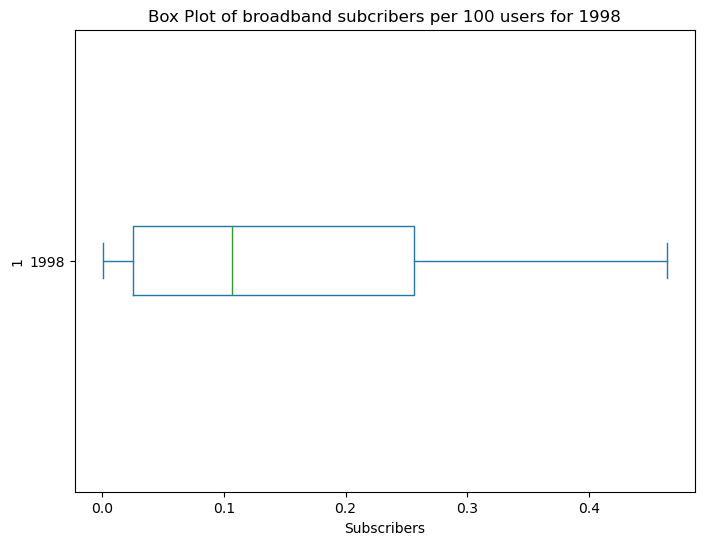

In [78]:
1998
df_2022 = broadband_subscribers_per_100.iloc[:,1]


plt.figure(figsize=(8, 6))
df_2022.plot(kind='box', vert=False)


plt.xlabel('Subscribers')
plt.ylabel('1')
plt.title('Box Plot of broadband subcribers per 100 users for 1998')
plt.yticks(rotation=0)

plt.show()

From this boxplot, you can tell that at the start of Broadband, the acessibility of it was close to 0 as it not only new, but also very expensive making it nearly inaccessible.

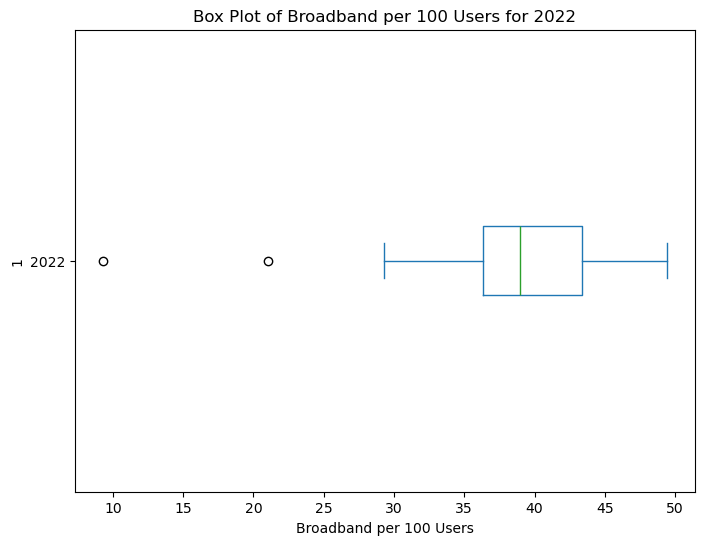

In [62]:
df_2022 = broadband_subscribers_per_100.iloc[:, -1]

# Create the box plot
plt.figure(figsize=(8, 6))
df_2022.plot(kind='box', vert=False)

# Add labels and title
plt.xlabel('Broadband per 100 Users')
plt.ylabel('1')
plt.title('Box Plot of Broadband per 100 Users for 2022')
plt.yticks(rotation=0)

plt.show()

From this boxplot, by 2022 the median is approx 38X the amount from 1998. There are also min outliers as close to 10 and 20 per 100 users. I think viewing the outliers is what im intrested in when analyzing the lowest GNI per cap.

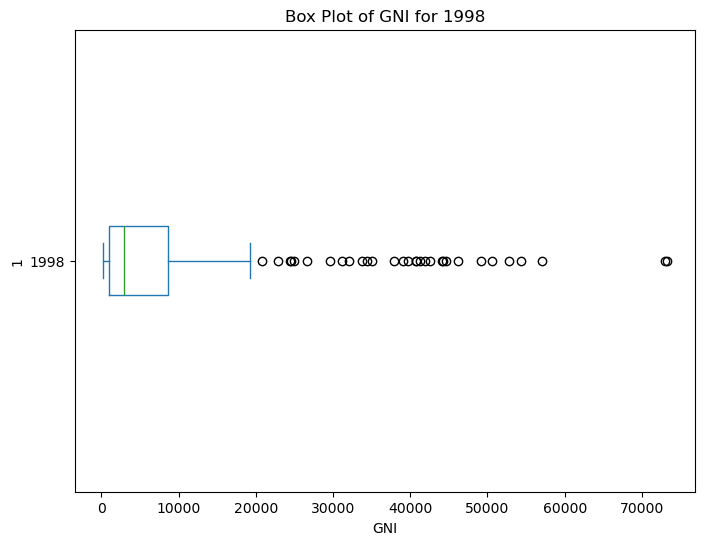

In [63]:
1998
df_2022 = df_20_years_gni.iloc[:, 1]


plt.figure(figsize=(8, 6))
df_2022.plot(kind='box', vert=False)


plt.xlabel('GNI')
plt.ylabel('1')
plt.title('Box Plot of GNI for 1998')
plt.yticks(rotation=0)

plt.show()

From this boxplot, you can see that the results from the summary stats table appear similar. Here you can be visualize the skew and the max outliers.

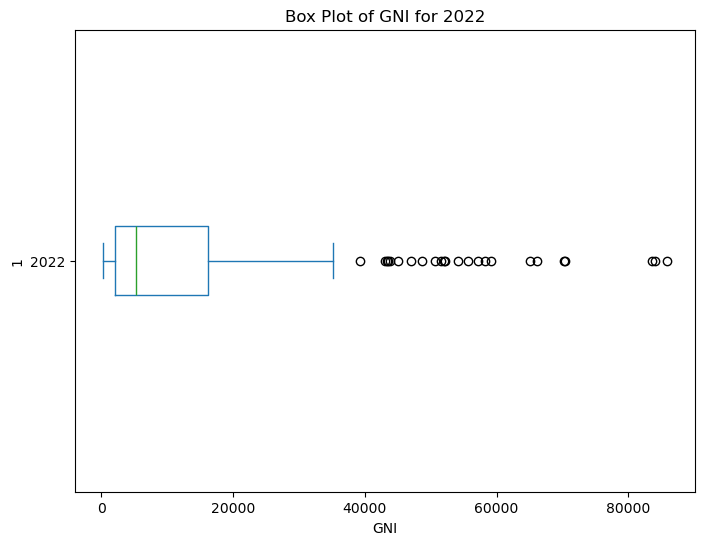

In [64]:
df_2022 = df_20_years_gni.iloc[:, -1]


plt.figure(figsize=(8, 6))
df_2022.plot(kind='box', vert=False)


plt.xlabel('GNI')
plt.ylabel('1')
plt.title('Box Plot of GNI for 2022')
plt.yticks(rotation=0)

plt.show()

From this boxplot, you can see the right skew and larger spread in GNI per cap in the max outliers.

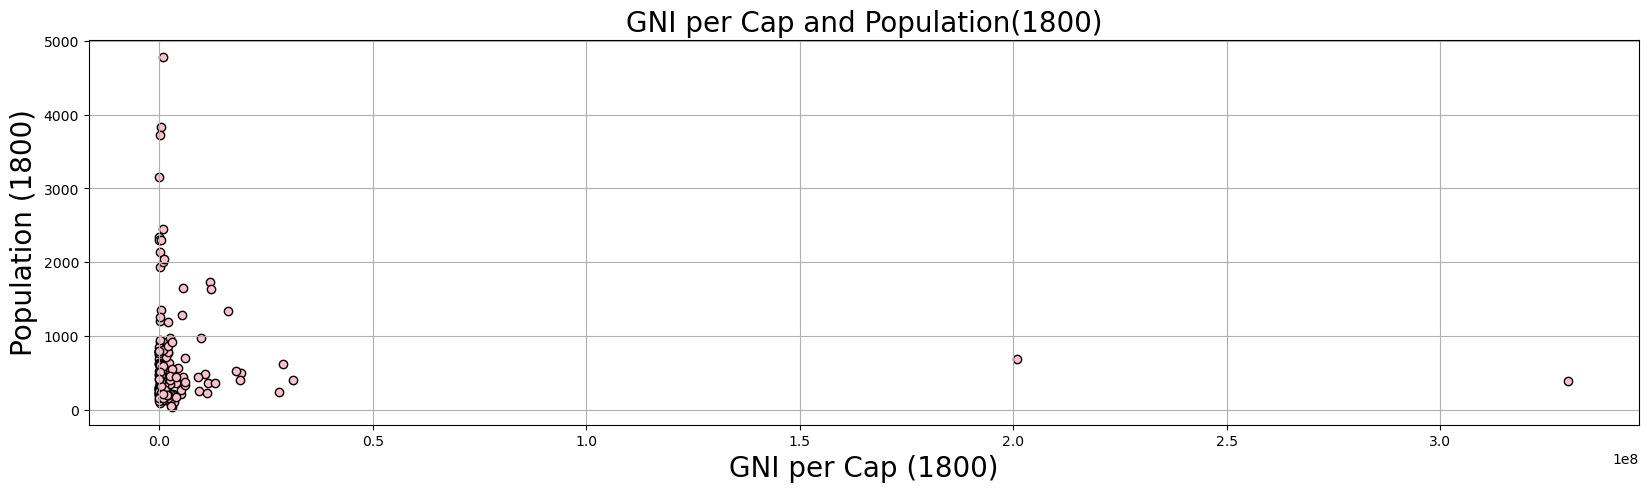

In [66]:
# Graph 2: Population and GNI in 1800
pop_over_time = df_twenty_less_pop['1800']  
gni_over_time = df_twenty_less_gni['1800']


min_length = min(len(pop_over_time), len(gni_over_time))
pop_over_time = pop_over_time[:min_length]
gni_over_time = gni_over_time[:min_length]


plt.figure(figsize=(20, 5)) 
plt.scatter(pop_over_time, gni_over_time, color='pink', edgecolor='black')
plt.xlabel('GNI per Cap (1800)', fontsize=20)
plt.ylabel('Population (1800)', fontsize=20)
plt.title('GNI per Cap and Population(1800)', fontsize = 20)
plt.grid() 
plt.show() 

GNI per cap(1800) and population(1800) in countries. 
- Overall in 1800, population and GNI shows that it is less disperse and less inequal.

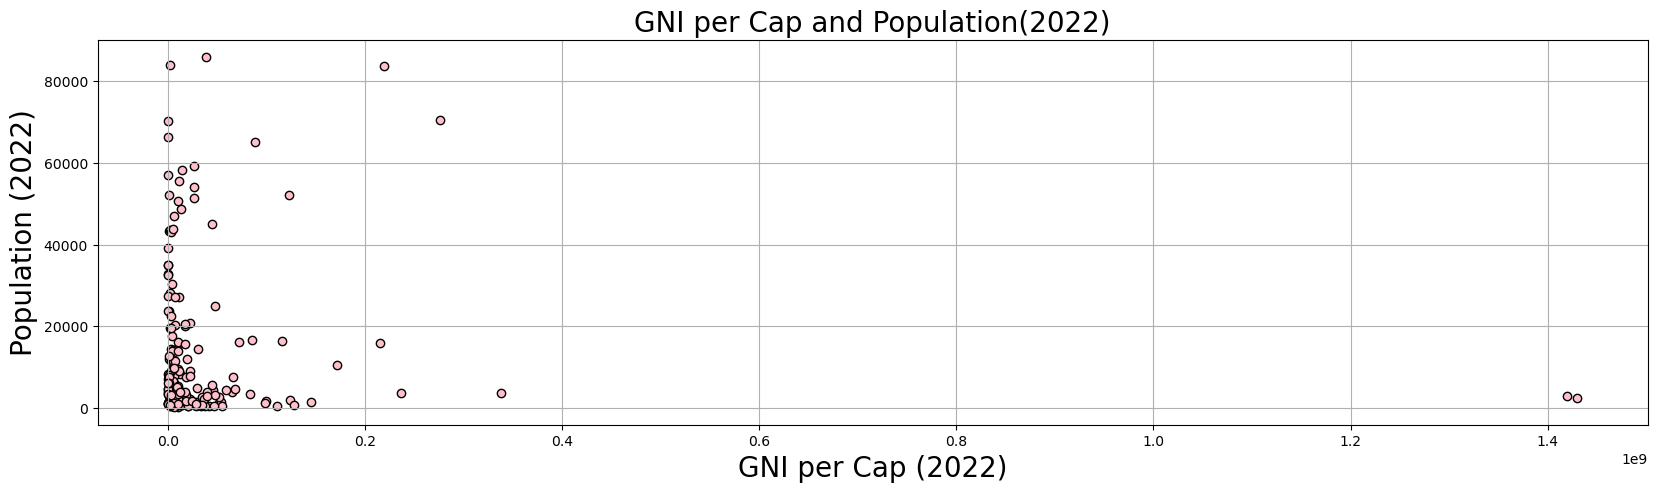

In [67]:
# Graph 1: Population and GNI - 2022
pop_over_time = df_twenty_less_pop['2022']  
gni_over_time = df_twenty_less_gni['2022']


min_length = min(len(pop_over_time), len(gni_over_time))
pop_over_time = pop_over_time[:min_length]
gni_over_time = gni_over_time[:min_length]


plt.figure(figsize=(20, 5)) 
plt.scatter(pop_over_time, gni_over_time, color='pink', edgecolor='black')
plt.xlabel('GNI per Cap (2022)', fontsize=20)
plt.ylabel('Population (2022)', fontsize=20)
plt.title('GNI per Cap and Population(2022)', fontsize = 20)
plt.grid() 
plt.show() 

A current look at GNI per Cap (2022) and population (2022) in countries.

- The graph above shows that as gni increases, the population doesnt neccessarily. There seems to be large amount of the population that has less gni per cap. This shows that the data is disperse. This is also show in the box plot for GNI per cap.

#### GNI per cap in 2022 (Top and lowest)

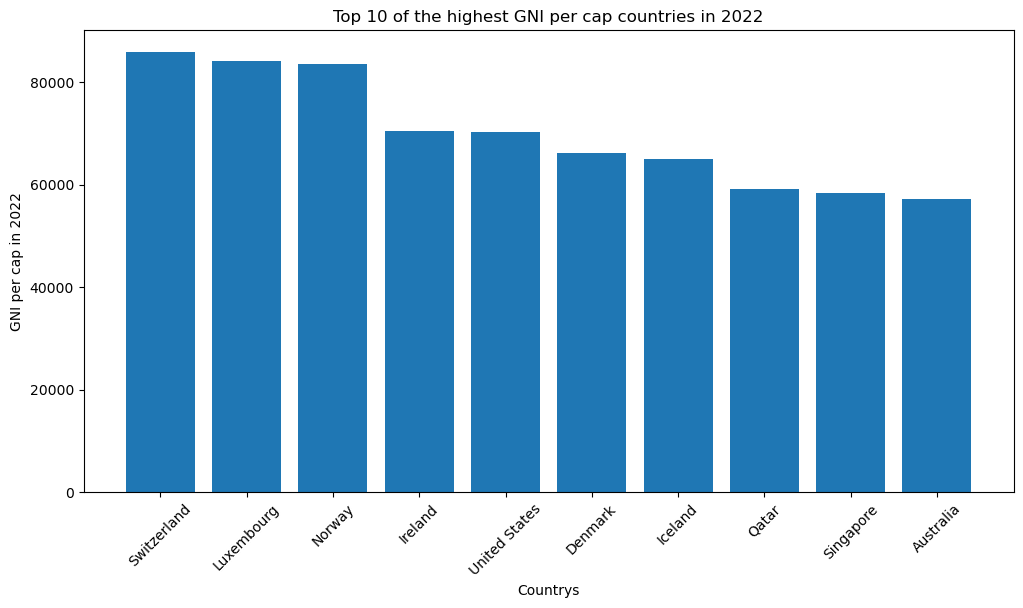

In [68]:
# Show Top 10 of the highest GNI per cap countries in 2022
df = top_10_gni


plt.figure(figsize=(12, 6))
plt.bar(df['country'], df['2022'])
plt.xlabel('Countrys')
plt.ylabel('GNI per cap in 2022')
plt.title('Top 10 of the highest GNI per cap countries in 2022')
plt.xticks(rotation=45)  
plt.show()

This chart shows the Top 10 of the highest GNI per cap countries in 2022 with Switzerland being the highest with approx a 80000 GNI per cap and Australia being in the bottom of the top ten with approx 60000 GNI per Cap. 


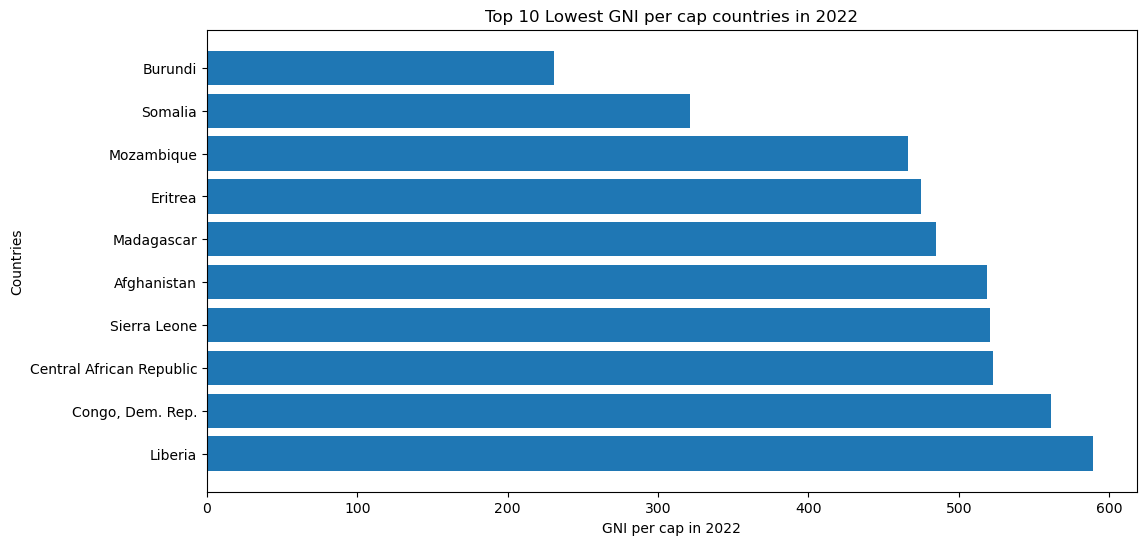

In [70]:
df = bottom_row_10_gni.sort_values('2022', ascending=False)  

plt.figure(figsize=(12, 6))
plt.barh(df['country'], df['2022'])  
plt.xlabel('GNI per cap in 2022')
plt.ylabel('Countries')
plt.title('Top 10 Lowest GNI per cap countries in 2022')
plt.show()

This chart shows the 10 lowest GNI per cap countries in GNI per Cap dataset in 2022. In this we can see that Burundi has the lowest GNI per cap in 2022 with approx 250 GNI per cap. All of these countries fall below the threshold used by the World Bank to classify countries as low-income economies which is $1,045.

In [71]:
broadband_subscribers_per_100.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
5,UAE,NaN,0.01180,0.0602,0.242,0.458,0.795,1.41,3.02,4.91,...,11.9,12.4,13.8,14.4,30.5,33.1,33.1,34.9,38.2,39.9
10,Austria,NaN,0.63700,2.3800,3.990,5.580,7.4,10.6,14.3,17.3,...,26.3,27.6,28.4,28.9,28.5,28.5,28.4,29.3,29.1,29.3
13,Belgium,0.10700,0.22500,1.4100,4.460,7.870,11.9,15.5,19.1,23.2,...,34.5,35.9,36.6,37.7,38.5,39.3,39.9,40.9,42.4,43.5
25,Brazil,0.00058,0.00403,0.0569,0.186,0.405,0.529,1.71,1.73,2.52,...,10.6,11.8,12.4,13.0,13.9,14.9,15.5,17.0,19.4,21.0
31,Canada,0.46400,1.91000,4.6000,9.150,11.200,14.3,17,21.7,24.7,...,34.5,35.5,36.7,37.1,38.1,39.0,40.4,41.1,42.1,43.1


Index(['country', '2022'], dtype='object')


/var/folders/75/6gzkq2015kzgqvg8sj4mg4mh0000gn/T/ipykernel_72363/3582835128.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


KeyError: 'broadband_subscribers_per_100'

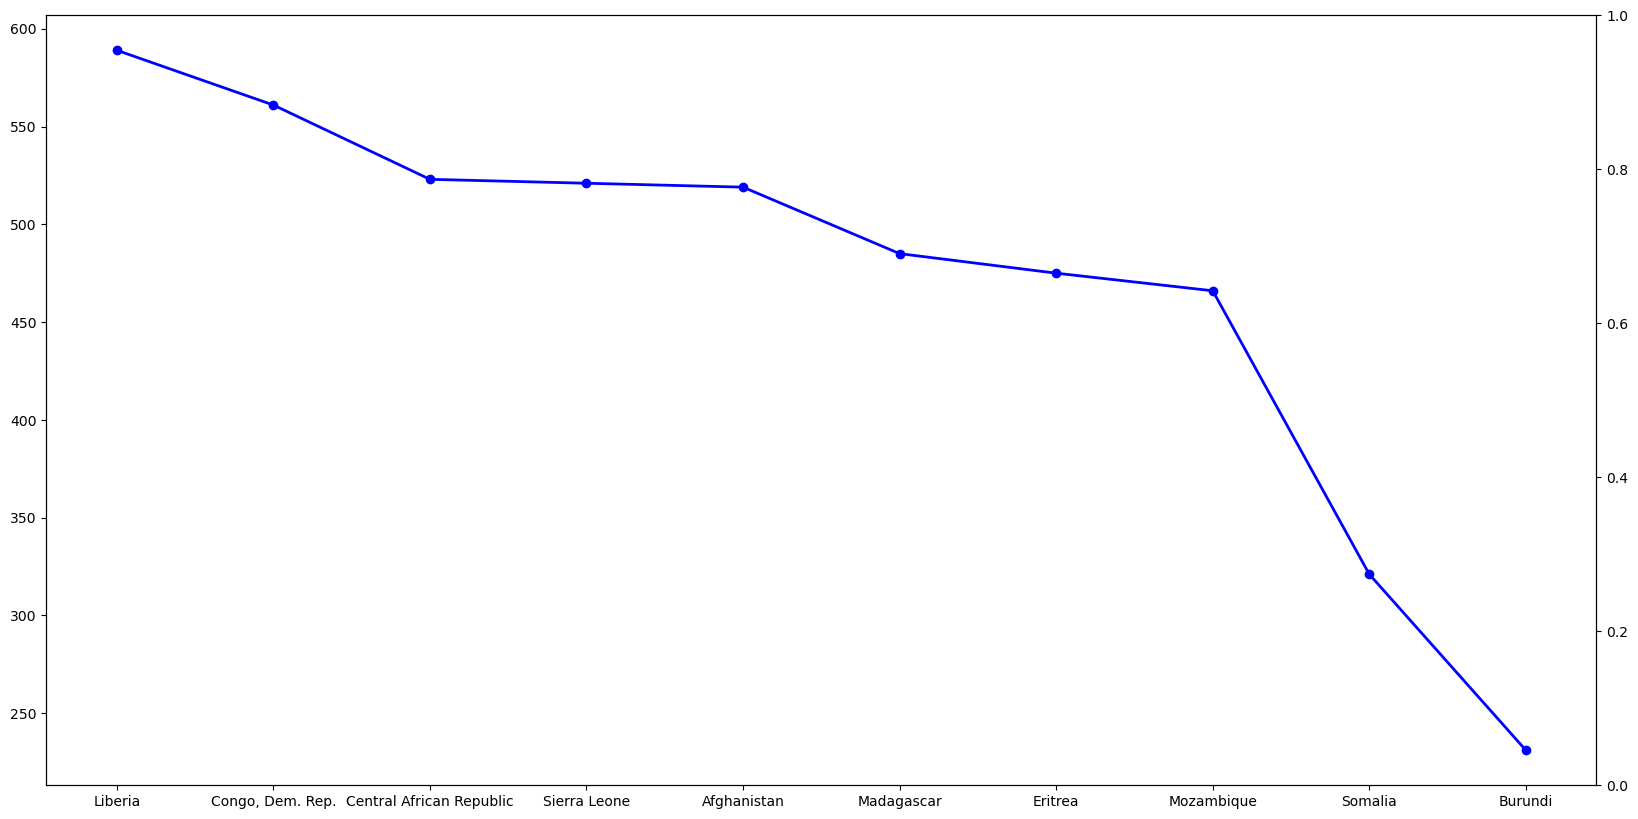

In [84]:
print(df.columns)

broadband_column = 'broadband_subscribers_per_100'  


top_10_countries = df.sort_values('2022', ascending=False).head(10)


color_map = plt.cm.get_cmap('tab10')
color_dict = {country: color_map(i/10) for i, country in enumerate(top_10_countries['country'])}


plt.figure(figsize=(20, 10)) 

plt.plot(top_10_countries['country'], top_10_countries['2022'], 
         marker='o', linestyle='-', linewidth=2, color='blue', label='GNI per Capita (2022)')


ax2 = plt.twinx()
ax2.plot(top_10_countries['country'], top_10_countries[broadband_column], 
         marker='s', linestyle='--', linewidth=2, color='red', label='Broadband Subscribers')


plt.title('Top 10 Countries by GNI and Their Broadband Subscribers (2022)', fontsize=16)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('GNI per Capita', fontsize=12)
ax2.set_ylabel('Broadband Subscribers', fontsize=12)


plt.xticks(rotation=45, ha='right')


plt.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

The right axis is the GNI per cap and the left axis is the broadband per subscribers. This shows how the unequal distrubtion of income limits the ability to acess broadband. Each point represents the countrys below.

In [76]:
top_10_gni.head()

,country,2022
0,Switzerland,85800.0
1,Luxembourg,84000.0
2,Norway,83600.0
3,Ireland,70400.0
4,United States,70300.0


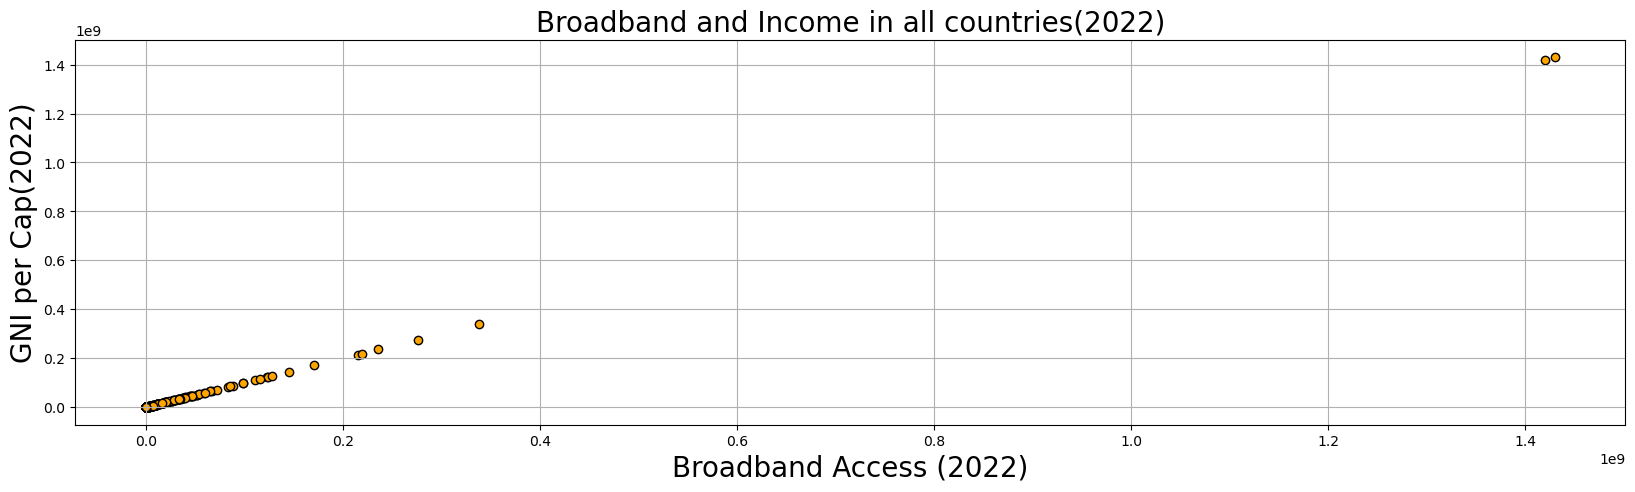

In [82]:
# Show Broadband, Income and population comparison (2022)
x = df_all['2022']  
y = df_all['2022']


plt.figure(figsize=(20, 5)) 
plt.scatter(x, y, color=['orange'], edgecolor='black')  
plt.xlabel('Broadband Access (2022)', fontsize = 20)
plt.ylabel('GNI per Cap(2022)', fontsize = 20)
plt.title('Broadband and Income in all countries(2022)', fontsize = 20)
plt.grid()
plt.show()

When comparing all of broadband, GNI and population, you can see that there is a positive relationship meaning that we can interpret that the more GNI per cap a country has, the more access to broadband they have respective to population.

## Conclusions and Recommendations

EXECUTIVE SUMMARY: 

The purpose of the study was to analyze data on Broadband subscribers per 100, gross national income, and population in global countries to demonstrate their relationships and answer the question of whether broadband is accessible globally for all.

In summary, the answer is no. Broadband is still not accessible globally for all, but it could be beneficial to create broadband infrastructure in certain parts of the world, specifically countries with lower incomes. There are still countries with low access to the internet, specifically countries with low incomes relative to population. 

The way that I decided to approach this was my first, considering the data that I needed to answer the question. I needed to decide between choosing Broadband subscribers per 100 or total broadband subscribers and choosing Broadband  subscribers per 100 because of the manageability and standardization of the data. After deciding what data to use, I began researching to formulate my hypothesis with the data. Based on my research, I hypothesized that it is not accessible for all globally because of the unequal distribution of income according to the population across the countries.

In my data cleaning process, I took the three data sets and identified null values, data types, variable names, and missing data. As I identified the data, I took appropriate measures to clean it by replacing missing data with no values, turning thousands, millions, and billions into floats/integers, changing data types, and dropping certain rows and columns that I considered either irrelevant information to the scope of the project or information that was not applicable for analysis such as empty rows or data that created forecasting predictions since I only needed current data. I mainly wanted to focus on comparing 1998 to 2022 to show the difference since the creation of broadband in both income and population. Then, I merged together to begin the exploratory data analysis process. Finally, I saved my data into their corresponding folders in the data folder of my project.

For my EDA, I decided to take the summary statistics from each data set and apply them to my analysis. I decided to take the gross national income median from 1998 to 2022 and create a separate data table. I took the median to compare median data with broadband data and countries. 

After this, I was interested in finding the top 10 countries with the highest income in 2022 compared to the broadband data in 2022. I found that Switzerland, Luxembourg, Norway, Ireland, the United States, Denmark, Iceland, Qatar, Singapore, and Australia had the highest income in 2022. 

I then was  interested in comparing that with the lowest incomes of countries in 2022, and I found that the Congo Democratic Republic, Central African Republic, Sierra Leone, Afghanistan, Madagascar, Eritrea, Mozambique, Somalia, and Burundi had the lowest incomes in 2022. After this, I wanted to take the global indicator of low income and verify that these countries all fell below the 1045 threshold number using boolean filtering.


From the data, my findings were that…

* There is an unequal distribution of gross national income over the years in global data of all countries.

* Areas with larger populations tend to have higher access to broadband.

* There is a positive correlation between higher income and broadband access. 

* The top 10 countries with the highest income have higher chance of accessing broadband, while the lowest GNI countries have a signficant less amount of access in relation to GNI Per cap.

* The lowest countries fall below the global number indicator of low income of $1045.


Based on my findings, I recommend that countries with less income should be prioritized for the broadband access fund from the large corporation. Countries such as Congo Dem. Republic, Central African Republic, Sierra Leone, Afghanistan, Madagascar, Eritrea, Mozambique, Somalia, and Burundi should be further researched into the feasibility of how broadband access could be implemented, even in high or low-population areas. Overall, Broadband access is important for closing the gap in resources and opportunities for those with limited access. It could potentially be beneficial in the long term for the country's economic development as well.

Limitations

Some of the limitations to this analysis include correlation vs. causation, feasibility in implementing due to government laws for certain countries and assessing other important factors to demonstrate how beneficial it is to have broadband access with other data such as education, healthcare impact, etc. 

Some project limitations include accidentally changing my original income dataset. Originally, my data set broadband needed an additional variable to show. The data was clean, but I saved it as a new file instead. I also had an issue with the top 10 lowest countries because of a null value that was not cleaned. Because of this, I showed 9 countries. Next time, I would also like to divide the incomes of all countries, organizing them between low, median, and high and comparing them all in that way.  

Sources:

Data reportal: https://datareportal.com/reports/digital-2023-united-states-of-america

FCC: https://www.fcc.gov/consumers/guides/getting-broadband-qa

Deloitte : https://www2.deloitte.com/us/en/pages/consulting/articles/bridging-the-digital-divide-with-broadband-for-all.html

Verizon: https://www.verizon.com/articles/internet-essentials/broadband-definition/

https://www.itu.int/itu-d/reports/statistics/2023/10/10/ff23-internet-use/

For python help:  

https://www.perplexity.ai/